In [12]:
import pandas as pd
import pandas as pd
from collections import Counter
import re


In [7]:
df = pd.read_excel("/Users/robinfischer/Desktop/HSall_rollcalls.xlsx")
df

,congress,chamber,rollnumber,date,session,clerk_rollnumber,yea_count,nay_count,nominate_mid_1,nominate_mid_2,nominate_spread_1,nominate_spread_2,nominate_log_likelihood,bill_number,vote_result,vote_desc,vote_question,dtl_desc
0,1,House,1,1789-05-16,NaN,NaN,41,8,484.0,-872.0,229.00,-378.00,-13144.00,HR2,NaN,NaN,NaN,"TO AMEND H.R. 2, (1 STAT. 24, APP. 7-4-1789), ..."
1,1,House,2,1789-05-22,NaN,NaN,36,1,256.0,967.0,-0.09,1791.00,-1.90,NaN,NaN,NaN,NaN,TO PASS THE RESOLUTION THAT IT APPEARS TO THIS...
2,1,House,3,1789-06-22,NaN,NaN,30,18,-394.0,-454.0,-176.00,922.00,-22048.00,HR8,NaN,NaN,NaN,"TO AMEND H.R. 8, (1 STAT. 28, APP. 7-27-1789),..."
3,1,House,4,1789-06-22,NaN,NaN,31,19,-194.0,-981.0,81.00,-327.00,-30355.00,HR8,NaN,NaN,NaN,"TO AMEND H.R. 8, SO AS TO ELIMINATE THE PRESID..."
4,1,House,5,1789-06-24,NaN,NaN,29,22,-197.0,-266.0,-168.00,984.00,-22221.00,HR8,NaN,NaN,NaN,TO PASS H.R. 8.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110278,118,Senate,65,2023-03-22,1.0,65.0,9,86,-782.0,588.0,319.00,0.42,-18693.00,S316,Amendment Rejected,To repeal the 2001 Authorization for Use of Mi...,On the Amendment,NaN
110279,118,Senate,66,2023-03-22,1.0,66.0,36,60,-411.0,615.0,-277.00,-1.62,-26239.00,S316,Amendment Rejected,To provide for more targeted authority under t...,On the Amendment,NaN
110280,118,Senate,67,2023-03-23,1.0,67.0,19,76,896.0,445.0,-0.28,772.00,-31.67,S316,Amendment Rejected,To provide for the termination of authorizatio...,On the Amendment,NaN
110281,118,Senate,68,2023-03-23,1.0,68.0,32,63,-574.0,741.0,-232.00,-1509.00,-32955.00,S316,Amendment Rejected,To require a certification.,On the Amendment,NaN


In [10]:
# Entferne Zeilen mit fehlenden Werten in dtl_desc
df = df.dropna(subset=['dtl_desc'])
df

,congress,chamber,rollnumber,date,session,clerk_rollnumber,yea_count,nay_count,nominate_mid_1,nominate_mid_2,nominate_spread_1,nominate_spread_2,nominate_log_likelihood,bill_number,vote_result,vote_desc,vote_question,dtl_desc
0,1,House,1,1789-05-16,NaN,NaN,41,8,484.00,-872.0,229.00,-378.0,-13144.0,HR2,NaN,NaN,NaN,"TO AMEND H.R. 2, (1 STAT. 24, APP. 7-4-1789), ..."
1,1,House,2,1789-05-22,NaN,NaN,36,1,256.00,967.0,-0.09,1791.0,-1.9,NaN,NaN,NaN,NaN,TO PASS THE RESOLUTION THAT IT APPEARS TO THIS...
2,1,House,3,1789-06-22,NaN,NaN,30,18,-394.00,-454.0,-176.00,922.0,-22048.0,HR8,NaN,NaN,NaN,"TO AMEND H.R. 8, (1 STAT. 28, APP. 7-27-1789),..."
3,1,House,4,1789-06-22,NaN,NaN,31,19,-194.00,-981.0,81.00,-327.0,-30355.0,HR8,NaN,NaN,NaN,"TO AMEND H.R. 8, SO AS TO ELIMINATE THE PRESID..."
4,1,House,5,1789-06-24,NaN,NaN,29,22,-197.00,-266.0,-168.00,984.0,-22221.0,HR8,NaN,NaN,NaN,TO PASS H.R. 8.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87946,106,House,1205,2000-12-04,2.0,599.0,348,6,0.00,0.0,0.00,0.0,0.0,S1761,Passed,Lower Rio Grande Valley Water Resources Conser...,"On Motion to Suspend the Rules and Pass, As Am...",S 1761 QUESTION: ON MOTION TO SUSPEND THE RULE...
87947,106,House,1206,2000-12-05,2.0,600.0,378,6,0.00,0.0,0.00,0.0,0.0,HJRES126,Passed,Making further continuing appropriations for F...,On Passage,H J RES 126 QUESTION: ON PASSAGE MAKING FURTHE...
87948,106,House,1207,2000-12-07,2.0,601.0,359,11,955.00,-295.0,292.00,299.0,-39988.0,HJRES127,Passed,Making further continuing appropriations for t...,On Passage,H J RES 127 QUESTION: ON PASSAGE MAKING FURTHE...
87949,106,House,1208,2000-12-08,2.0,602.0,284,37,-0.54,-99.0,-243.00,133.0,-70019.0,HJRES128,Passed,Making further continuing appropriations for f...,On Passage,H J RES 128 QUESTION: ON PASSAGE MAKING FURTHE...


In [13]:
# Funktion zur Bereinigung und Tokenisierung des Textes
def preprocess_text(text):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    # Zerlege den Text in Wörter (Tokenisierung)
    words = text.split()
    return words

# Wende die Funktion auf die Spalte dtl_desc an und erhalte eine Liste aller Wörter
all_words = []
df['dtl_desc'].apply(lambda x: all_words.extend(preprocess_text(x)))

# Zähle die Häufigkeit jedes Wortes
word_counts = Counter(all_words)

# Ausgabe der häufigsten Wörter
common_words = word_counts.most_common(50)  # Hier werden die 50 häufigsten Wörter angezeigt
for word, count in common_words:
    print(f'{word}: {count}')

the: 213443
to: 192024
of: 138511
and: 67241
for: 53941
a: 47021
in: 36449
hr: 34967
by: 34511
on: 30033
amend: 26353
p: 25995
amendment: 25545
that: 23624
bill: 22444
s: 20036
act: 17026
be: 15833
h: 14241
motion: 13970
house: 13406
from: 13283
pass: 12944
or: 12078
resolution: 11966
as: 11443
which: 10932
an: 10638
providing: 10375
with: 10137
committee: 10042
senate: 9909
r: 9380
appropriations: 8994
res: 8293
table: 8181
states: 7865
fiscal: 7073
shall: 6818
order: 6715
any: 6557
report: 6356
not: 6314
passed: 6290
at: 6255
consideration: 6173
no: 5726
us: 5577
stat: 5538
rules: 5516


In [14]:
from nltk.corpus import stopwords
import nltk

# Stelle sicher, dass du die Stoppwörter herunterlädst, falls noch nicht geschehen
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robinfischer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# Funktion zur Bereinigung und Tokenisierung des Textes
def preprocess_text(text):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    # Zerlege den Text in Wörter (Tokenisierung)
    words = text.split()
    return words

# Definiere die Stoppwörter
stop_words = set(stopwords.words('english'))

# Wende die Funktion auf die Spalte dtl_desc an und erhalte eine Liste aller Wörter, exklusive der Stoppwörter
all_words = []
df['dtl_desc'].apply(lambda x: all_words.extend([word for word in preprocess_text(x) if word not in stop_words]))

# Zähle die Häufigkeit jedes Wortes
word_counts = Counter(all_words)

# Ausgabe der häufigsten Wörter
common_words = word_counts.most_common(10000)  # Hier werden die 50 häufigsten Wörter angezeigt
for word, count in common_words:
    print(f'{word}: {count}')

# Speichere die Wortfrequenzen in einem DataFrame
word_freq_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Speichere die Ergebnisse in einer Excel-Datei
word_freq_df.to_excel('word_frequencies.xlsx', index=False)

print("Die häufigsten Wörter wurden in 'word_frequencies.xlsx' gespeichert.")

hr: 34967
amend: 26353
p: 25995
amendment: 25545
bill: 22444
act: 17026
h: 14241
motion: 13970
house: 13406
pass: 12944
resolution: 11966
providing: 10375
committee: 10042
senate: 9909
r: 9380
appropriations: 8994
res: 8293
table: 8181
states: 7865
fiscal: 7073
shall: 6818
order: 6715
report: 6356
passed: 6290
consideration: 6173
us: 5577
stat: 5538
rules: 5516
united: 5454
agree: 5355
certain: 5186
year: 5166
state: 5037
provide: 4724
made: 4649
making: 4639
suspend: 4631
adjourn: 4534
congress: 4514
president: 4419
public: 4170
conference: 4001
funds: 3933
government: 3921
federal: 3897
debate: 3568
national: 3466
district: 3423
question: 3420
substitute: 3399
department: 3343
per: 3270
authorizing: 3254
service: 3104
app: 3078
section: 3078
agreed: 3066
appropriation: 2977
rejected: 2954
vote: 2920
million: 2896
said: 2885
tax: 2870
may: 2752
relating: 2700
recommit: 2571
whole: 2569
secretary: 2569
provides: 2568
new: 2528
military: 2527
treaty: 2507
duty: 2427
amendments: 2419
yea

In [16]:
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk


# Erstelle Bigramme
bigrams = list(ngrams(all_words, 2))

# Zähle die Häufigkeit der Bigramme
bigram_counts = Counter(bigrams)

# Ausgabe der häufigsten Bigramme
common_bigrams = bigram_counts.most_common(50)  # Hier werden die 50 häufigsten Bigramme angezeigt
for bigram, count in common_bigrams:
    print(f'{bigram}: {count}')

('amend', 'hr'): 8958
('h', 'r'): 8827
('p', 'amend'): 7133
('pass', 'hr'): 5420
('united', 'states'): 5157
('hr', 'bill'): 5054
('suspend', 'rules'): 4315
('motion', 'passed'): 4090
('amendment', 'hr'): 3729
('fiscal', 'year'): 3517
('p', 'pass'): 3056
('conference', 'report'): 2936
('h', 'res'): 2910
('amend', 'h'): 2819
('making', 'appropriations'): 2634
('rules', 'pass'): 2459
('p', 'table'): 2449
('committee', 'whole'): 2142
('motion', 'made'): 1894
('bill', 'making'): 1882
('p', 'adjourn'): 1873
('motion', 'failed'): 1843
('senate', 'amendment'): 1837
('j', 'res'): 1786
('resolution', 'providing'): 1759
('hr', 'stat'): 1707
('pass', 'h'): 1705
('reconsider', 'vote'): 1698
('report', 'hr'): 1670
('consideration', 'hr'): 1668
('amendment', 'h'): 1637
('year', 'ending'): 1624
('stat', 'bill'): 1617
('district', 'columbia'): 1608
('house', 'agreed'): 1569
('see', 'notes'): 1515
('bill', 'providing'): 1473
('house', 'rejected'): 1462
('made', 'debate'): 1410
('r', 'stat'): 1323
('hr',

In [20]:
# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['nature', 'substitute']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "nature substitute": {total_yea_count}')
print(f'Total nay_count für "nature substitute": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "nature substitute": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "nature substitute": {average_nay_count}')

Total yea_count für "nature substitute": 121936
Total nay_count für "nature substitute": 149303
Durchschnittlicher yea_count für "nature substitute": 104.57632933104631
Durchschnittlicher nay_count für "nature substitute": 128.04716981132074


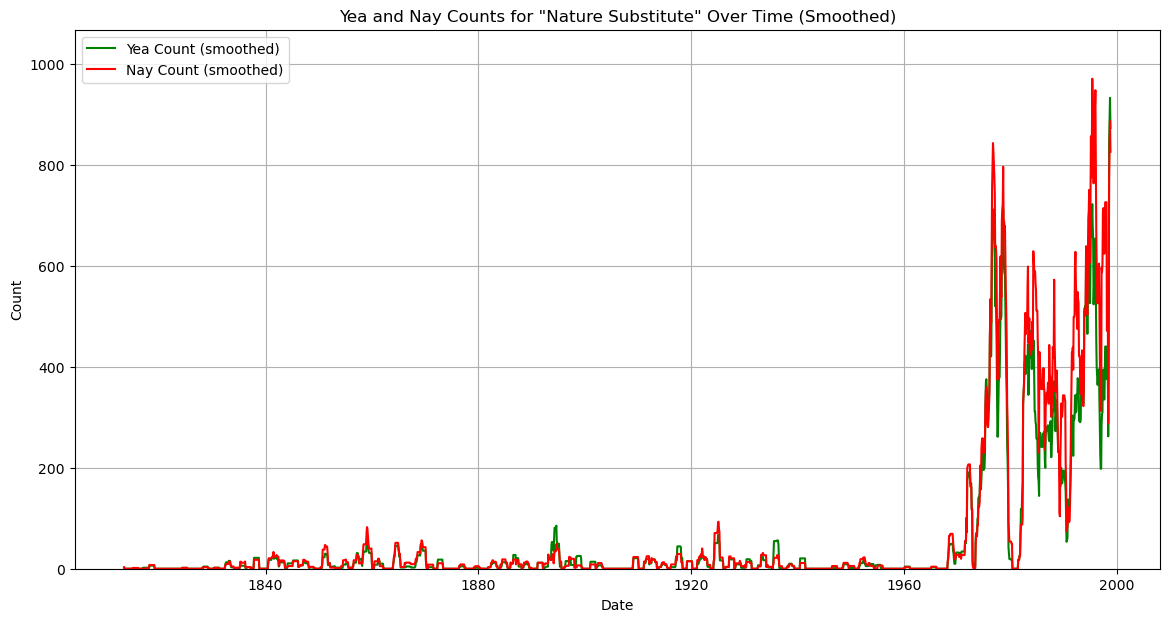

Total yea_count für "nature substitute": 121936
Total nay_count für "nature substitute": 149303
Durchschnittlicher yea_count für "nature substitute": 104.57632933104631
Durchschnittlicher nay_count für "nature substitute": 128.04716981132074


In [40]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Konvertiere die Spalte 'date' in ein Datetime-Format ohne explizites Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Konvertiere die Spalten 'yea_count' und 'nay_count' in numerische Werte und entferne nicht konvertierbare Werte
df['yea_count'] = pd.to_numeric(df['yea_count'], errors='coerce')
df['nay_count'] = pd.to_numeric(df['nay_count'], errors='coerce')

# Entferne Zeilen, bei denen die Konvertierung fehlschlug (d.h. wo NaN-Werte entstanden sind)
df = df.dropna(subset=['yea_count', 'nay_count'])

# Sicherstellen, dass 'yea_count' und 'nay_count' nur numerische Werte enthalten
df = df[df['yea_count'].apply(lambda x: isinstance(x, (int, float)))]
df = df[df['nay_count'].apply(lambda x: isinstance(x, (int, float)))]

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['nature', 'substitute']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Gruppiere nach Datum und summiere yea_count und nay_count
filtered_df = filtered_df.set_index('date')
time_series_df = filtered_df[['yea_count', 'nay_count']].resample('M').sum()

# Apply rolling mean to smooth the data
time_series_df['yea_count'] = time_series_df['yea_count'].rolling(window=12).mean()
time_series_df['nay_count'] = time_series_df['nay_count'].rolling(window=12).mean()

# Plotten der Zeitreihe
plt.figure(figsize=(14, 7))
plt.plot(time_series_df.index, time_series_df['yea_count'], label='Yea Count (smoothed)', color='green')
plt.plot(time_series_df.index, time_series_df['nay_count'], label='Nay Count (smoothed)', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Yea and Nay Counts for "Nature Substitute" Over Time (Smoothed)')
plt.legend()
plt.grid(True)
plt.ylim(0, max(time_series_df['yea_count'].max(), time_series_df['nay_count'].max()) * 1.1)
plt.show()

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "nature substitute": {total_yea_count}')
print(f'Total nay_count für "nature substitute": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "nature substitute": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "nature substitute": {average_nay_count}')


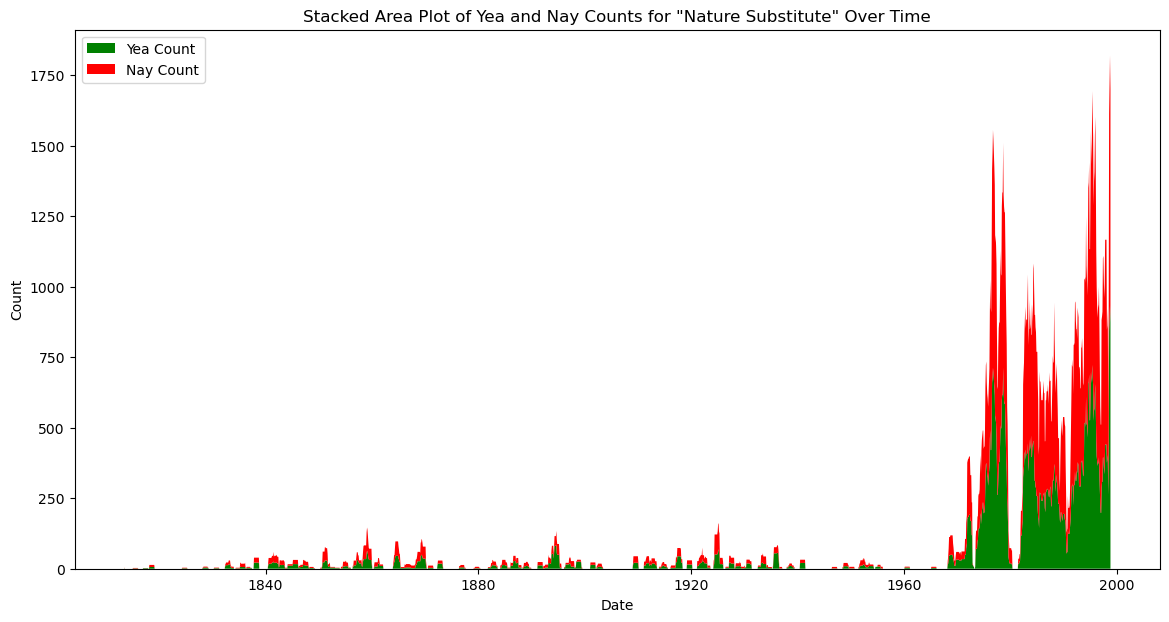

In [42]:
# Stacked Area Plot
plt.figure(figsize=(14, 7))
plt.stackplot(time_series_df.index, time_series_df['yea_count'], time_series_df['nay_count'], labels=['Yea Count', 'Nay Count'], colors=['green', 'red'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Stacked Area Plot of Yea and Nay Counts for "Nature Substitute" Over Time')
plt.legend(loc='upper left')
plt.show()


In [24]:
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk


# Erstelle Bigramme
bigrams = list(ngrams(all_words, 2))

# Zähle die Häufigkeit der Bigramme
bigram_counts = Counter(bigrams)

# Ausgabe der häufigsten Bigramme
common_bigrams = bigram_counts.most_common(100)  # Hier werden die 50 häufigsten Bigramme angezeigt
for bigram, count in common_bigrams:
    print(f'{bigram}: {count}')

('amend', 'hr'): 8958
('h', 'r'): 8827
('p', 'amend'): 7133
('pass', 'hr'): 5420
('united', 'states'): 5157
('hr', 'bill'): 5054
('suspend', 'rules'): 4315
('motion', 'passed'): 4090
('amendment', 'hr'): 3729
('fiscal', 'year'): 3517
('p', 'pass'): 3056
('conference', 'report'): 2936
('h', 'res'): 2910
('amend', 'h'): 2819
('making', 'appropriations'): 2634
('rules', 'pass'): 2459
('p', 'table'): 2449
('committee', 'whole'): 2142
('motion', 'made'): 1894
('bill', 'making'): 1882
('p', 'adjourn'): 1873
('motion', 'failed'): 1843
('senate', 'amendment'): 1837
('j', 'res'): 1786
('resolution', 'providing'): 1759
('hr', 'stat'): 1707
('pass', 'h'): 1705
('reconsider', 'vote'): 1698
('report', 'hr'): 1670
('consideration', 'hr'): 1668
('amendment', 'h'): 1637
('year', 'ending'): 1624
('stat', 'bill'): 1617
('district', 'columbia'): 1608
('house', 'agreed'): 1569
('see', 'notes'): 1515
('bill', 'providing'): 1473
('house', 'rejected'): 1462
('made', 'debate'): 1410
('r', 'stat'): 1323
('hr',

In [45]:
# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['agriculture', 'bill']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "aggriculture bill": {total_yea_count}')
print(f'Total nay_count für "aggriculture bill": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "agriculture-bill": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "aggriculture-bill": {average_nay_count}')

Total yea_count für "aggriculture bill": 43100
Total nay_count für "aggriculture bill": 25253
Durchschnittlicher yea_count für "agriculture-bill": 134.6875
Durchschnittlicher nay_count für "aggriculture-bill": 78.915625


In [47]:
import pandas as pd
import re

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe für die Abstimmung
search_terms_nature_substitute = ['agriculture', 'bill']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df_nature_substitute = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms_nature_substitute))]

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count_ns = filtered_df_nature_substitute['yea_count'].sum()
total_nay_count_ns = filtered_df_nature_substitute['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "agriculture bill": {total_yea_count_ns}')
print(f'Total nay_count für "agriculture bill": {total_nay_count_ns}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count_ns = filtered_df_nature_substitute['yea_count'].mean()
average_nay_count_ns = filtered_df_nature_substitute['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "agriculture bill": {average_yea_count_ns}')
print(f'Durchschnittlicher nay_count für "agriculture bill": {average_nay_count_ns}')

# Definiere die zu suchenden Begriffe für die Kombination "agriculture bill"
search_terms_agriculture_bill = ['agriculture', 'bill']

# Zähle die Zeilen, die beide Begriffe enthalten
agriculture_bill_count = df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms_agriculture_bill)).sum()

print(f'Anzahl der Vorkommen der Kombination "agriculture bill": {agriculture_bill_count}')


Total yea_count für "agriculture bill": 43100
Total nay_count für "agriculture bill": 25253
Durchschnittlicher yea_count für "agriculture bill": 134.6875
Durchschnittlicher nay_count für "agriculture bill": 78.915625
Anzahl der Vorkommen der Kombination "agriculture bill": 320


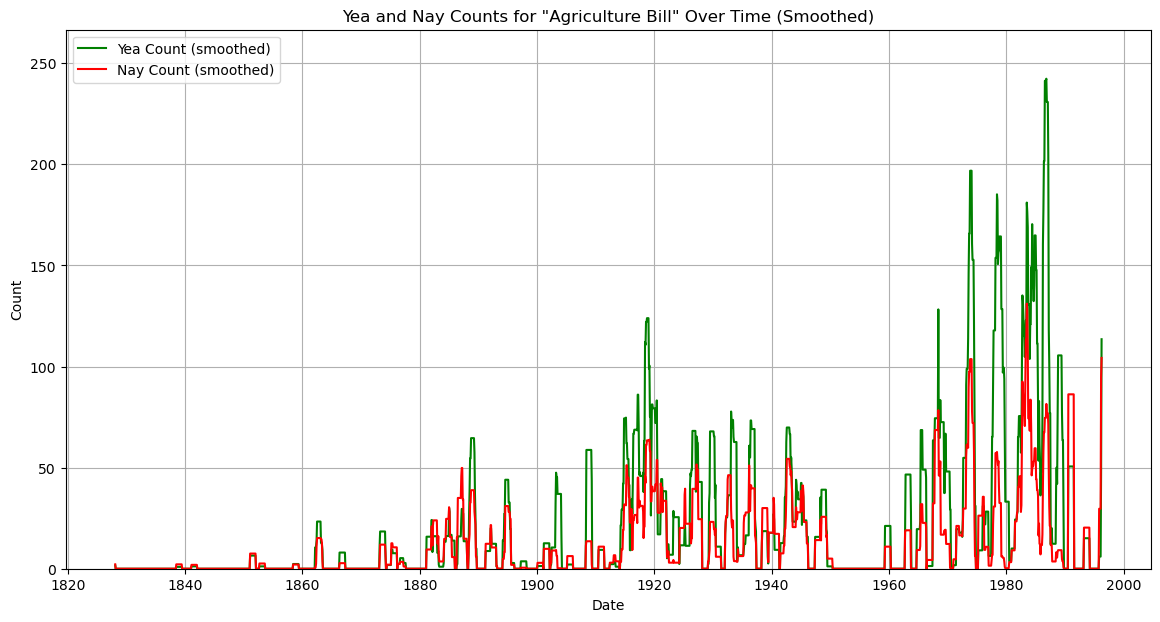

Total yea_count für "agriculture bill": 43100
Total nay_count für "agriculture bill": 25253
Durchschnittlicher yea_count für "Agriculture Bill": 134.6875
Durchschnittlicher nay_count für "agriculture bill": 78.915625


In [49]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Konvertiere die Spalte 'date' in ein Datetime-Format ohne explizites Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Konvertiere die Spalten 'yea_count' und 'nay_count' in numerische Werte und entferne nicht konvertierbare Werte
df['yea_count'] = pd.to_numeric(df['yea_count'], errors='coerce')
df['nay_count'] = pd.to_numeric(df['nay_count'], errors='coerce')

# Entferne Zeilen, bei denen die Konvertierung fehlschlug (d.h. wo NaN-Werte entstanden sind)
df = df.dropna(subset=['yea_count', 'nay_count'])

# Sicherstellen, dass 'yea_count' und 'nay_count' nur numerische Werte enthalten
df = df[df['yea_count'].apply(lambda x: isinstance(x, (int, float)))]
df = df[df['nay_count'].apply(lambda x: isinstance(x, (int, float)))]

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['agriculture', 'bill']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Gruppiere nach Datum und summiere yea_count und nay_count
filtered_df = filtered_df.set_index('date')
time_series_df = filtered_df[['yea_count', 'nay_count']].resample('M').sum()

# Apply rolling mean to smooth the data
time_series_df['yea_count'] = time_series_df['yea_count'].rolling(window=12).mean()
time_series_df['nay_count'] = time_series_df['nay_count'].rolling(window=12).mean()

# Plotten der Zeitreihe
plt.figure(figsize=(14, 7))
plt.plot(time_series_df.index, time_series_df['yea_count'], label='Yea Count (smoothed)', color='green')
plt.plot(time_series_df.index, time_series_df['nay_count'], label='Nay Count (smoothed)', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Yea and Nay Counts for "Agriculture Bill" Over Time (Smoothed)')
plt.legend()
plt.grid(True)
plt.ylim(0, max(time_series_df['yea_count'].max(), time_series_df['nay_count'].max()) * 1.1)
plt.show()

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "agriculture bill": {total_yea_count}')
print(f'Total nay_count für "agriculture bill": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "Agriculture Bill": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "agriculture bill": {average_nay_count}')


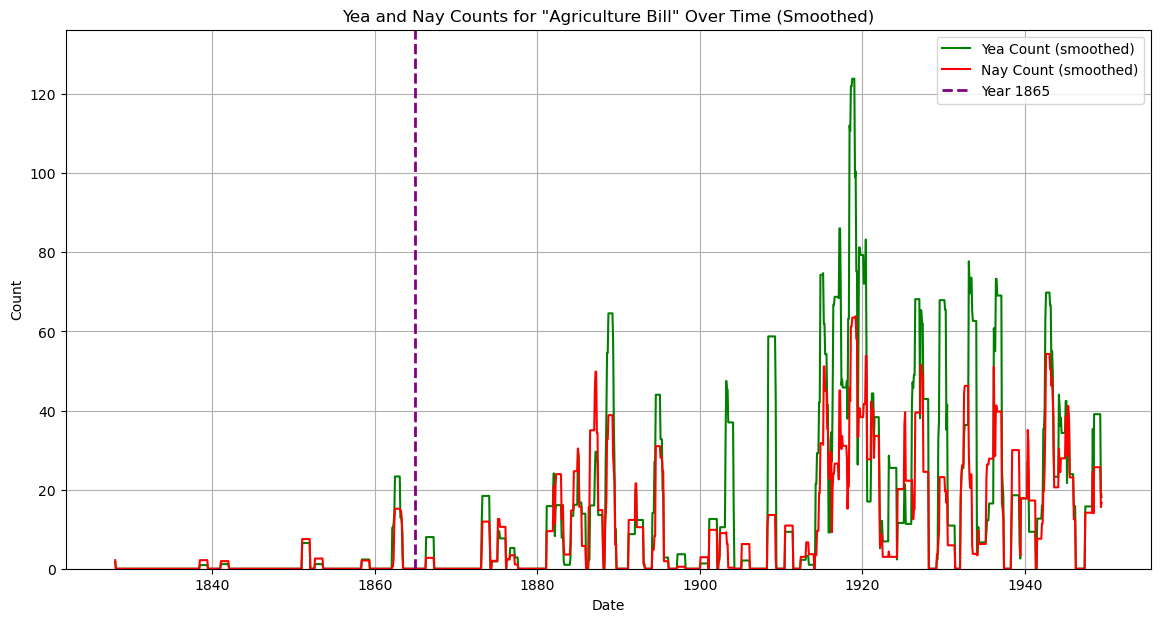

Total yea_count für "agriculture bill": 19208
Total nay_count für "agriculture bill": 13441
Durchschnittlicher yea_count für "Agriculture Bill": 102.17021276595744
Durchschnittlicher nay_count für "agriculture bill": 71.49468085106383


In [56]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Konvertiere die Spalte 'date' in ein Datetime-Format ohne explizites Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Konvertiere die Spalten 'yea_count' und 'nay_count' in numerische Werte und entferne nicht konvertierbare Werte
df['yea_count'] = pd.to_numeric(df['yea_count'], errors='coerce')
df['nay_count'] = pd.to_numeric(df['nay_count'], errors='coerce')

# Entferne Zeilen, bei denen die Konvertierung fehlschlug (d.h. wo NaN-Werte entstanden sind)
df = df.dropna(subset=['yea_count', 'nay_count'])

# Sicherstellen, dass 'yea_count' und 'nay_count' nur numerische Werte enthalten
df = df[df['yea_count'].apply(lambda x: isinstance(x, (int, float)))]
df = df[df['nay_count'].apply(lambda x: isinstance(x, (int, float)))]

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['agriculture', 'bill']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Begrenze den Datensatz auf die Periode bis 1900
filtered_df = filtered_df[filtered_df['date'] <= '1950-12-31']

# Gruppiere nach Datum und summiere yea_count und nay_count
filtered_df = filtered_df.set_index('date')
time_series_df = filtered_df[['yea_count', 'nay_count']].resample('M').sum()

# Apply rolling mean to smooth the data
time_series_df['yea_count'] = time_series_df['yea_count'].rolling(window=12).mean()
time_series_df['nay_count'] = time_series_df['nay_count'].rolling(window=12).mean()

# Plotten der Zeitreihe
plt.figure(figsize=(14, 7))
plt.plot(time_series_df.index, time_series_df['yea_count'], label='Yea Count (smoothed)', color='green')
plt.plot(time_series_df.index, time_series_df['nay_count'], label='Nay Count (smoothed)', color='red')

#Highlight 1865 
plt.axvline(pd.Timestamp('1865-01-01'), color='purple', linestyle='--', lw=2, label='Year 1865')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Yea and Nay Counts for "Agriculture Bill" Over Time (Smoothed)')
plt.legend()
plt.grid(True)
plt.ylim(0, max(time_series_df['yea_count'].max(), time_series_df['nay_count'].max()) * 1.1)
plt.show()

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "agriculture bill": {total_yea_count}')
print(f'Total nay_count für "agriculture bill": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "Agriculture Bill": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "agriculture bill": {average_nay_count}')


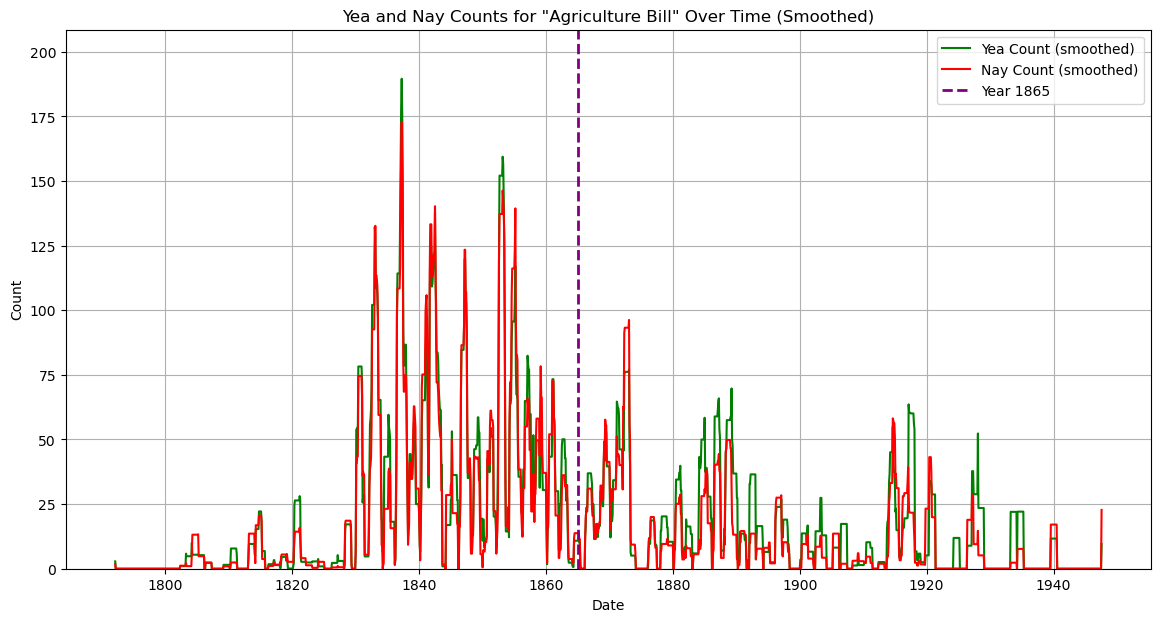

Total yea_count für "public lands": 36542
Total nay_count für "public lands": 32642
Durchschnittlicher yea_count für "public lands": 53.976366322008865
Durchschnittlicher nay_count für "public lands": 48.215657311669126


In [55]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Konvertiere die Spalte 'date' in ein Datetime-Format ohne explizites Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Konvertiere die Spalten 'yea_count' und 'nay_count' in numerische Werte und entferne nicht konvertierbare Werte
df['yea_count'] = pd.to_numeric(df['yea_count'], errors='coerce')
df['nay_count'] = pd.to_numeric(df['nay_count'], errors='coerce')

# Entferne Zeilen, bei denen die Konvertierung fehlschlug (d.h. wo NaN-Werte entstanden sind)
df = df.dropna(subset=['yea_count', 'nay_count'])

# Sicherstellen, dass 'yea_count' und 'nay_count' nur numerische Werte enthalten
df = df[df['yea_count'].apply(lambda x: isinstance(x, (int, float)))]
df = df[df['nay_count'].apply(lambda x: isinstance(x, (int, float)))]

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['public', 'lands']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Begrenze den Datensatz auf die Periode bis 1900
filtered_df = filtered_df[filtered_df['date'] <= '1950-12-31']

# Gruppiere nach Datum und summiere yea_count und nay_count
filtered_df = filtered_df.set_index('date')
time_series_df = filtered_df[['yea_count', 'nay_count']].resample('M').sum()

# Apply rolling mean to smooth the data
time_series_df['yea_count'] = time_series_df['yea_count'].rolling(window=12).mean()
time_series_df['nay_count'] = time_series_df['nay_count'].rolling(window=12).mean()

# Plotten der Zeitreihe
plt.figure(figsize=(14, 7))
plt.plot(time_series_df.index, time_series_df['yea_count'], label='Yea Count (smoothed)', color='green')
plt.plot(time_series_df.index, time_series_df['nay_count'], label='Nay Count (smoothed)', color='red')

#Highlight 1865 
plt.axvline(pd.Timestamp('1865-01-01'), color='purple', linestyle='--', lw=2, label='Year 1865')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Yea and Nay Counts for "Agriculture Bill" Over Time (Smoothed)')
plt.legend()
plt.grid(True)
plt.ylim(0, max(time_series_df['yea_count'].max(), time_series_df['nay_count'].max()) * 1.1)
plt.show()

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "public lands": {total_yea_count}')
print(f'Total nay_count für "public lands": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "public lands": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "public lands": {average_nay_count}')


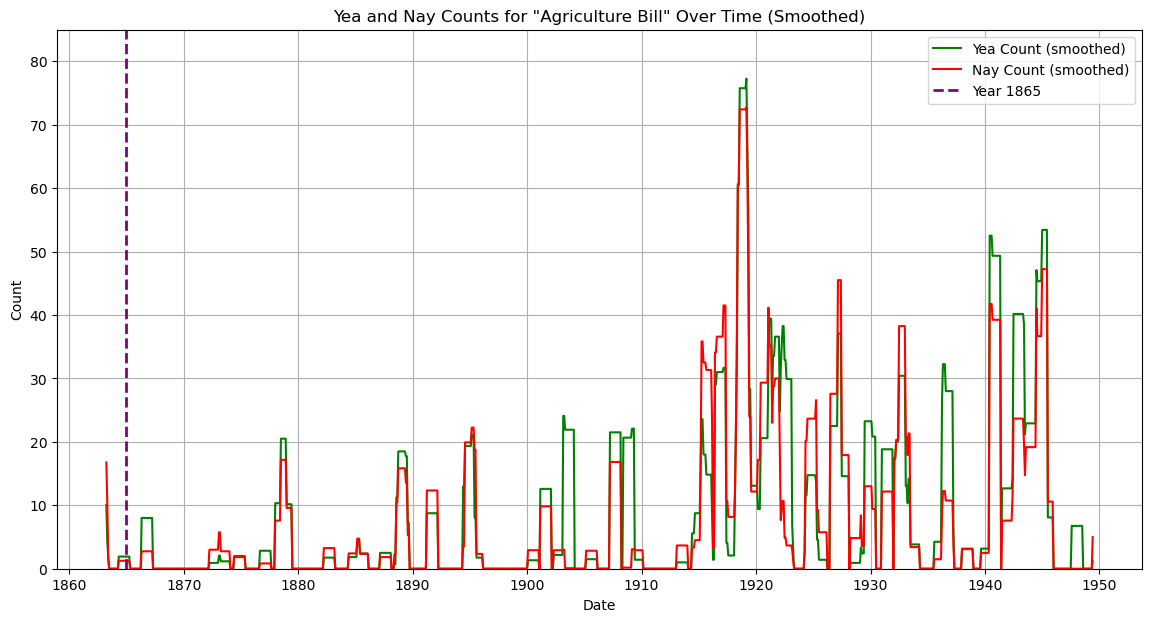

Total yea_count für "public lands": 9314
Total nay_count für "public lands": 8202
Durchschnittlicher yea_count für "public lands": 86.24074074074075
Durchschnittlicher nay_count für "public lands": 75.94444444444444


In [57]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Entferne Zeilen mit fehlenden Werten in dtl_desc, yea_count oder nay_count
df = df.dropna(subset=['dtl_desc', 'yea_count', 'nay_count'])

# Konvertiere die Spalte 'date' in ein Datetime-Format ohne explizites Format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Konvertiere die Spalten 'yea_count' und 'nay_count' in numerische Werte und entferne nicht konvertierbare Werte
df['yea_count'] = pd.to_numeric(df['yea_count'], errors='coerce')
df['nay_count'] = pd.to_numeric(df['nay_count'], errors='coerce')

# Entferne Zeilen, bei denen die Konvertierung fehlschlug (d.h. wo NaN-Werte entstanden sind)
df = df.dropna(subset=['yea_count', 'nay_count'])

# Sicherstellen, dass 'yea_count' und 'nay_count' nur numerische Werte enthalten
df = df[df['yea_count'].apply(lambda x: isinstance(x, (int, float)))]
df = df[df['nay_count'].apply(lambda x: isinstance(x, (int, float)))]

# Funktion zur Bereinigung und Überprüfung, ob beide Begriffe im Text vorkommen
def contains_terms(text, terms):
    # Entferne Sonderzeichen und Zahlen
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # In Kleinbuchstaben umwandeln
    text = text.lower()
    return all(term in text for term in terms)

# Definiere die zu suchenden Begriffe
search_terms = ['agriculture', 'amendment']

# Filtere die Zeilen, die beide Begriffe enthalten
filtered_df = df[df['dtl_desc'].apply(lambda x: contains_terms(x, search_terms))]

# Begrenze den Datensatz auf die Periode bis 1900
filtered_df = filtered_df[filtered_df['date'] <= '1950-12-31']

# Gruppiere nach Datum und summiere yea_count und nay_count
filtered_df = filtered_df.set_index('date')
time_series_df = filtered_df[['yea_count', 'nay_count']].resample('M').sum()

# Apply rolling mean to smooth the data
time_series_df['yea_count'] = time_series_df['yea_count'].rolling(window=12).mean()
time_series_df['nay_count'] = time_series_df['nay_count'].rolling(window=12).mean()

# Plotten der Zeitreihe
plt.figure(figsize=(14, 7))
plt.plot(time_series_df.index, time_series_df['yea_count'], label='Yea Count (smoothed)', color='green')
plt.plot(time_series_df.index, time_series_df['nay_count'], label='Nay Count (smoothed)', color='red')

#Highlight 1865 
plt.axvline(pd.Timestamp('1865-01-01'), color='purple', linestyle='--', lw=2, label='Year 1865')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Yea and Nay Counts for "Agriculture Bill" Over Time (Smoothed)')
plt.legend()
plt.grid(True)
plt.ylim(0, max(time_series_df['yea_count'].max(), time_series_df['nay_count'].max()) * 1.1)
plt.show()

# Berechne die Summe von yea_count und nay_count für diese gefilterten Zeilen
total_yea_count = filtered_df['yea_count'].sum()
total_nay_count = filtered_df['nay_count'].sum()

# Ausgabe der Ergebnisse
print(f'Total yea_count für "public lands": {total_yea_count}')
print(f'Total nay_count für "public lands": {total_nay_count}')

# Berechne den Durchschnitt von yea_count und nay_count für diese gefilterten Zeilen
average_yea_count = filtered_df['yea_count'].mean()
average_nay_count = filtered_df['nay_count'].mean()

print(f'Durchschnittlicher yea_count für "public lands": {average_yea_count}')
print(f'Durchschnittlicher nay_count für "public lands": {average_nay_count}')
